In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [77]:
def format_bytes(x, pos):
    if x < 1024:
        return f'{int(x)} B'
    elif x < 1024**2:
        return f'{int(x / 1024)} KB'
    elif x < 1024**3:
        return f'{int(x / 1024**2)} MB'
    else:
        return f'{int(x / 1024**3)} GB'

In [78]:
# Read CSV
df = pd.read_csv('./compression_table_input.png.csv')

display(df)

,Window Size,Huffman Time,Huffman Ratio,LZ77 Time,LZ77 Ratio,Deflate Time,Deflate Ratio,First CR,Second CR
0,4,0.0012,1.1755,0.0031,0.9964,0.0036,1.1706,0.9964,1.1747
1,8,0.0008,1.1755,0.0017,0.9985,0.0025,1.1745,0.9985,1.1763
2,16,0.0008,1.1755,0.0012,0.9995,0.0020,1.1755,0.9995,1.1761
3,32,0.0007,1.1755,0.0013,1.0017,0.0020,1.1765,1.0017,1.1745
4,64,0.0006,1.1755,0.0014,1.2733,0.0020,1.3875,1.2733,1.0897
5,128,0.0006,1.1755,0.0022,1.3597,0.0028,1.4553,1.3597,1.0703
6,256,0.0009,1.1755,0.0037,1.3659,0.0041,1.4599,1.3659,1.0688
7,512,0.0006,1.1755,0.0060,1.4051,0.0065,1.4925,1.4051,1.0622
8,1024,0.0005,1.1755,0.0104,1.4170,0.0104,1.5038,1.4170,1.0612
9,2048,0.0005,1.1755,0.0168,1.4478,0.0170,1.5317,1.4478,1.0580


In [79]:
# Show only the Window size, Deflate Ratio, First CR and Second CR
display(df[['Window Size', 'Deflate Ratio', 'First CR', 'Second CR']])

,Window Size,Deflate Ratio,First CR,Second CR
0,4,1.1706,0.9964,1.1747
1,8,1.1745,0.9985,1.1763
2,16,1.1755,0.9995,1.1761
3,32,1.1765,1.0017,1.1745
4,64,1.3875,1.2733,1.0897
5,128,1.4553,1.3597,1.0703
6,256,1.4599,1.3659,1.0688
7,512,1.4925,1.4051,1.0622
8,1024,1.5038,1.4170,1.0612
9,2048,1.5317,1.4478,1.0580


In [80]:
colors = ['#0072B2', '#E69F00', '#56B4E9']

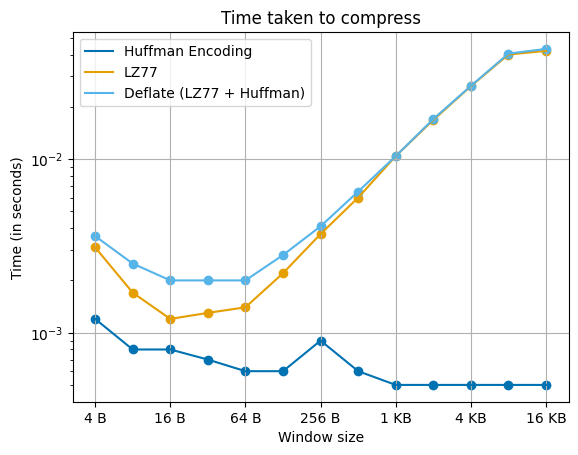

In [81]:
# Plot timings

window_size = df['Window Size']
huffman_time = df['Huffman Time']
lz77_time = df['LZ77 Time']
deflate_time = df['Deflate Time']


plt.plot(window_size, huffman_time, label='Huffman Encoding', color=colors[0])
plt.plot(window_size, lz77_time, label='LZ77', color=colors[1])
plt.plot(window_size, deflate_time, label='Deflate (LZ77 + Huffman)', color=colors[2])

plt.scatter(window_size, huffman_time, color=colors[0])
plt.scatter(window_size, lz77_time, color=colors[1])
plt.scatter(window_size, deflate_time, color=colors[2])

plt.title('Time taken to compress')
plt.xlabel('Window size')
plt.xscale('log', base=2)
plt.yscale('log')
plt.ylabel('Time (in seconds)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_bytes))
plt.xticks(window_size[::2])
plt.show()

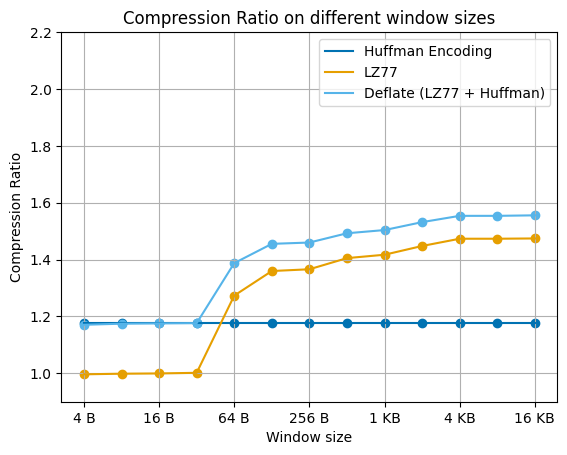

In [82]:
# Plot compression ratio

window_size = df['Window Size']
huffman_ratio = df['Huffman Ratio']
lz77_ratio = df['LZ77 Ratio']
deflate_ratio = df['Deflate Ratio']


plt.plot(window_size, huffman_ratio, label='Huffman Encoding', color=colors[0])
plt.plot(window_size, lz77_ratio, label='LZ77', color=colors[1])
plt.plot(window_size, deflate_ratio, label='Deflate (LZ77 + Huffman)', color=colors[2])

plt.scatter(window_size, huffman_ratio, color=colors[0])
plt.scatter(window_size, lz77_ratio, color=colors[1])
plt.scatter(window_size, deflate_ratio, color=colors[2])

plt.title('Compression Ratio on different window sizes')
plt.xscale('log', base=2)
plt.xlabel('Window size')
plt.ylim(0.9, 2.2)
plt.ylabel('Compression Ratio')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_bytes))
plt.xticks(window_size[::2])
plt.show()

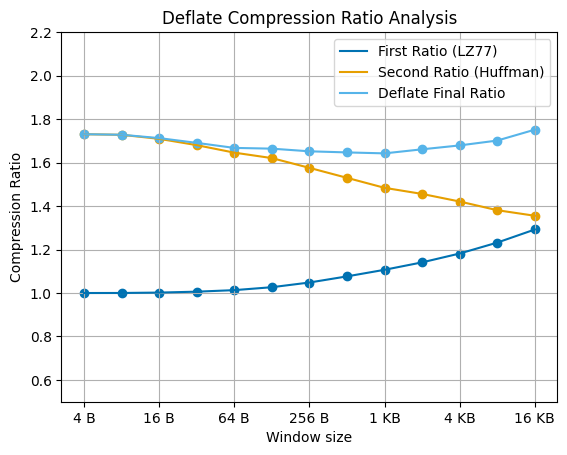

In [66]:
# Plot compression ratio of first and second step in Deflate

window_size = df['Window Size']
first_cr = df['First CR']
second_cr = df['Second CR']
deflate_final_cr = df['Deflate Ratio']


plt.plot(window_size, first_cr, label='First Ratio (LZ77)', color=colors[0])
plt.plot(window_size, second_cr, label='Second Ratio (Huffman)', color=colors[1])
plt.plot(window_size, deflate_final_cr, label='Deflate Final Ratio', color=colors[2])

plt.scatter(window_size, first_cr, color=colors[0])
plt.scatter(window_size, second_cr, color=colors[1])
plt.scatter(window_size, deflate_final_cr, color=colors[2])

plt.title('Deflate Compression Ratio Analysis')
plt.xscale('log', base=2)
plt.xlabel('Window size')
plt.ylim(0.5, 2.2)
plt.ylabel('Compression Ratio')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_bytes))
plt.xticks(window_size[::2])
plt.show()